# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Описание данных


    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    balcony — число балконов
    ceiling_height — высота потолков (м)
    cityCenters_nearest — расстояние до центра города (м)
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    first_day_exposition — дата публикации
    floor — этаж
    floors_total — всего этажей в доме
    is_apartment — апартаменты (булев тип)
    kitchen_area — площадь кухни в квадратных метрах (м²)
    last_price — цена на момент снятия с публикации
    living_area — жилая площадь в квадратных метрах(м²)
    locality_name — название населённого пункта
    open_plan — свободная планировка (булев тип)
    parks_around3000 — число парков в радиусе 3 км
    parks_nearest — расстояние до ближайшего парка (м)
    ponds_around3000 — число водоёмов в радиусе 3 км
    ponds_nearest — расстояние до ближайшего водоёма (м)
    rooms — число комнат
    studio — квартира-студия (булев тип)
    total_area — площадь квартиры в квадратных метрах (м²)
    total_images — число фотографий квартиры в объявлении
    Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

1. Вступление [`Шаг_1`](#Шаг_1)

2. Предобработка [`Шаг_2`](#Шаг_2)

3. Добавление столбцов [`Шаг_3`](#Шаг_3)

4. Анализ взаимосвязей [`Шаг_4`](#Шаг_4)

# Шаг_1

# Откройте файл с данными и изучите общую информацию. 

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = 'C:/Users/Mikhail/оформление/Исследовательский анализ данных/'

try:
    data= pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data= pd.read_csv(path + 'real_estate_data.csv', sep='\t')

pd.set_option("display.max_columns", 50)

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [64]:
data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

(None,
        total_images    last_price    total_area         rooms  ceiling_height  \
 count  23699.000000  2.369900e+04  23699.000000  23699.000000    14504.000000   
 mean       9.858475  6.541549e+06     60.348651      2.070636        2.771499   
 std        5.682529  1.088701e+07     35.654083      1.078405        1.261056   
 min        0.000000  1.219000e+04     12.000000      0.000000        1.000000   
 25%        6.000000  3.400000e+06     40.000000      1.000000        2.520000   
 50%        9.000000  4.650000e+06     52.000000      2.000000        2.650000   
 75%       14.000000  6.800000e+06     69.900000      3.000000        2.800000   
 max       50.000000  7.630000e+08    900.000000     19.000000      100.000000   
 
        floors_total   living_area         floor  kitchen_area       balcony  \
 count  23613.000000  21796.000000  23699.000000  21421.000000  12180.000000   
 mean      10.673824     34.457852      5.892358     10.569807      1.150082   
 std        6

1. Среднеквадратичное отклонение высокое по всем столбцам.
2. Есть аномально высокие значения в высоте потолков(100м), 
3. Есть и аномально низкие:
        число комнат - 0
        высота потолков - 1м
        жилая площадь - 2м
        площадь кухни - 1.3м

    

In [65]:
report = data.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / data.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
is_apartment,20924,0.88
parks_nearest,15620,0.66
ponds_nearest,14589,0.62
balcony,11519,0.49
ceiling_height,9195,0.39
airports_nearest,5542,0.23
cityCenters_nearest,5519,0.23
ponds_around3000,5518,0.23
parks_around3000,5518,0.23
days_exposition,3181,0.13


1. В столбце ceiling_height 40% значений пропущены
2. В столбце living_area пропущено ~2000 значений - 8%
3. В столбце kitchen_area пропущено ~2000 значений - 10%
4. Столбец is_apartment изменить object на bool?
5. Балконы есть лишь у половины данных
5. в locality_name пропущено 49 значений - 0,2%
6. airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest - имеют многочисленные пропуски, но могут быть связаны с тем, что данных знаечний нет и вряд ли их можно заменить средним/медианой.
8. days_exposition порядка 3000 пропусков - 13%.
9. Перевести last_price в int. Нужно ли переводить floors_total к int? - этажи целочисленные.


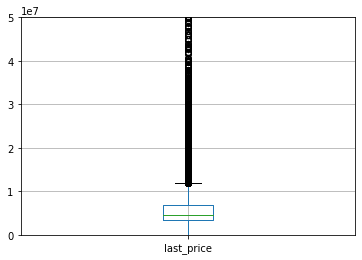

In [66]:
plt.ylim(0, 50000000)
data.boxplot('last_price', figsize=(3, 9))
plt.show()

1. Большинство значений лежит до ~12 млн.
2. В свою очередь, если проанализировать по сайтам недвижимости, то стоимость квартиры в >500млн не так уж редки

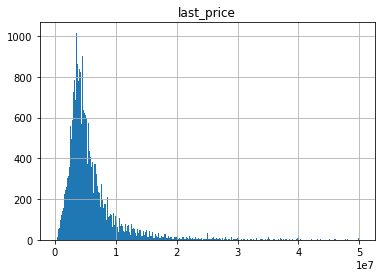

In [67]:
data.hist(column = 'last_price', bins = 300, range = (0, 50000000))
plt.show()

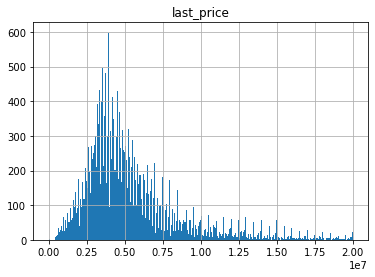

In [68]:
data.hist(column = 'last_price', bins = 300, range = (0, 20000000))
plt.show()

1. на обеих гистограммах виден пик в районе 2.5 - 5млн и длинный хвост в сторону увеличения стоимости недвижимости.
2. На гистограмме, с ограничением до 20млн, видны всплески значений.
3. Могут ли цены по сгруппированые по городу Санкт-Петербург влиять на хвост и распределение цен, т.к цены в крупных городах на недвижимость выше, чем в других городах?

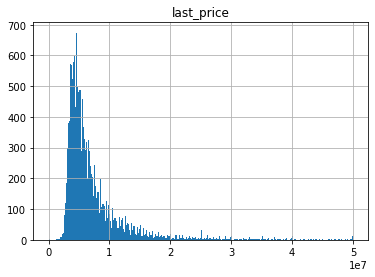

In [69]:
data.query('locality_name == "Санкт-Петербург"').hist(column='last_price', bins=300, range=(0, 50000000))
plt.show()

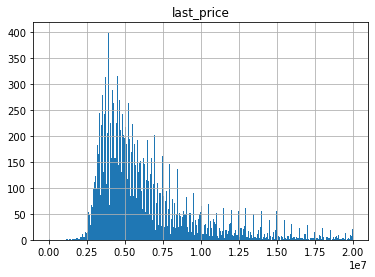

In [70]:
data.query('locality_name == "Санкт-Петербург"').hist(column='last_price', bins=300, range=(0, 20000000))
plt.show()

В целом гистограмма распределения цены по Санкт-Петергбургу не отличает от общей гистрограммы, за исключением большего роста цены в начальных значениях от 2.5млн до 5млн.

(0.0, 10.0)

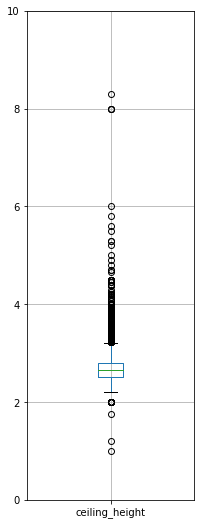

In [71]:
data.boxplot('ceiling_height', figsize=(3,9))
plt.ylim(0,10)

In [72]:
data.query('ceiling_height <= 2.1')['ceiling_height'].count(), data.query('ceiling_height >= 3.5')['ceiling_height'].count()

(14, 434)



1. Все значения ниже 2.1м не валидны, либо заменить на минимальное по СНиП, либо поставить среднее/медиану по городу 

2. В свою очередь, высота потолков в сталинке может составлять 3-3.5 м.

3. Совокупно непроходящих сзначений 448 - 1,8% - это много, чтоьы просто выбросить их, надо преобразовать значения.

In [73]:
data['locality_name'].value_counts()

Санкт-Петербург         15721
посёлок Мурино            522
посёлок Шушары            440
Всеволожск                398
Пушкин                    369
                        ...  
деревня Вахнова Кара        1
поселок Жилгородок          1
поселок Ромашки             1
село Никольское             1
посёлок Ропша               1
Name: locality_name, Length: 364, dtype: int64

66% всех данных приходяися на Санкт-Петербург

In [74]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Апартаментами(нежилые моещения) является 50 значений, 2725 - нет, остальные это пропущеные значения?

23609

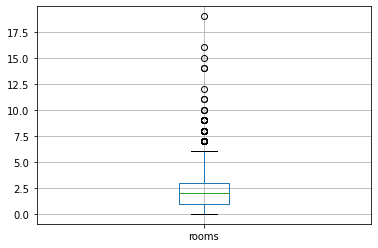

In [75]:
data.boxplot('rooms')
data.query('rooms < 7')['rooms'].count() # 0,4 %

In [76]:
data.query('rooms == 0')['rooms'].count()

197

In [77]:
data.query(' rooms == 0 & is_apartment == True ')['rooms'].count()

0

In [78]:
data.query(' rooms == 0 & studio == True ')['rooms'].count()

138

1. 0 комнат - это не апаратаменты.
2. 0 комнат - это в большинстве своем студии, в котрых жилплощядь совмещена с кухней.
2. Остальные значения 0 комнат - 0.2% значений и их можно отбросить.
3. Квартир с комнатми >7 - 0,4%

23581

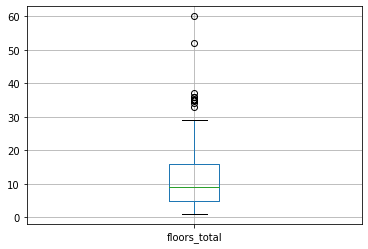

In [79]:
data.boxplot('floors_total')
data.query('floors_total < 30')['floors_total'].count() # 0,5%

In [80]:
data['floors_total'].value_counts(dropna=False, ascending=False)

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
NaN       86
1.0       25
35.0      24
28.0      21
36.0       3
33.0       1
29.0       1
60.0       1
52.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64

1. Дома с неизвестным числом этажей - 0,3%.
2. Дома с аномально большим числом этажей(>30) - 0,5%

21763

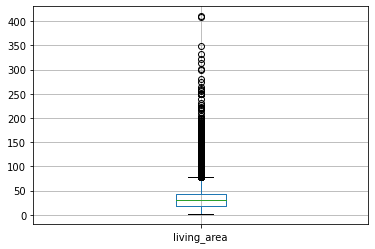

In [81]:
data.boxplot('living_area')
#data.query('living_area < 100')['living_area'].count() # 2,7% потерь данных - много
data.query('living_area < 200')['living_area'].count() # 0,2% потерь данных - можно отбросить
#data['living_area'].count() # 21796 НЕ-nan

1. При сортировке недвижимости в Яндекс.недвижимость минимальным значением жилого помещения получилось 10м, все что ниже, можно отбросить(0,1%)
2. значения >200м составляют 0,2%

In [82]:
data['kitchen_area'].count()

21421

21265

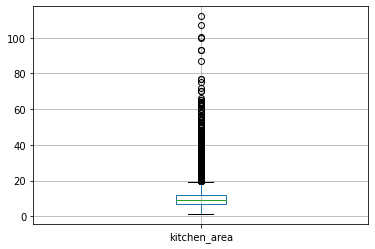

In [83]:
data.boxplot('kitchen_area')
#data.query('kitchen_area < 20')['kitchen_area'].count() # 5,5% - Много
data.query('kitchen_area < 40')['kitchen_area'].count() # 0,8% 


In [84]:
data.query('kitchen_area < 5')['kitchen_area'].count()

105

1. П. 5.7 СП 54.13330.2011 устанавливает, что кухня-ниша (помещение с кухонным оборудованием но без обеденной зоны) в однушке может быть 5 кв. м., все что меньше - нарушение. Всего таких знчений 105 - (0,4%)
2. Аномально высоких значений, которые можно отбросить без больших потерь данных(kitchen_area > 40) - 0,8%

### Вывод

# Шаг_2

# Предобработка данных

**определите и изучите пропущенные значения:**
1. для некоторых пропущенных значений можно предположить логичную замену. Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. Для других типов данных нет подходящего значения на замену. В этом случае правильно оставить эти значения пустыми. Отсутствие значения — тоже важный сигнал, который не нужно прятать;
2. заполните пропуски, где это уместно. Опишите, почему вы решили заполнить пропуски именно в этих столбцах и как выбрали значения;
3. укажите причины, которые могли привести к пропускам в данных.

**приведите данные к нужным типам:**
1. поясните, в каких столбцах нужно изменить тип данных и почему.

# Balcony

заполним все пропущеные значения на 0, в таком случае это так же не повляет на веротяность искажения общей площади.

In [85]:
data['balcony'] = data['balcony'].fillna(value=0)
#data

# ceiling_height

СНиП 31-01-2003 Здания жилые многоквартирные(New)
1. Высота (от пола до потолка) жилых помещений и кухни (кухни-столовой) в климатических районах IА, IБ, IГ, IД и IVA должна быть не менее 2,7 м, а в других климатических районах - не менее 2,5 м.
2. Высота внутриквартирных коридоров, холлов, передних, антресолей (и под ними) определяется условиями безопасности передвижения людей и должна составлять не менее 2,1 м.

Заполню по такому принципу:
1. Пропущеные значения заполню медианой сгруппировав по городам/населеным пунктам
1. Заполнив пропущеные значения, значения меньше минимального приведу к минимум по СНиП(2.1м), а значения выше 3.5м приведу к максимальной высоте, выбросить такие значения выглядит менее приоритетно т.к их 1,8%

In [86]:
city_list = data['locality_name'].unique()
for element in city_list: 
    med = data.loc[data['locality_name'] == element]['ceiling_height'].median()
    data.loc[data['locality_name'] == element, 'ceiling_height'] = data.loc[data['locality_name'] == element, 'ceiling_height'].fillna(med)
#data.info()

Все пропущеные значения высоты потолка были заменены медианой каждого населеного пункта, но осталисись значения, которые не имеют группировки по городу их можно отсеить - 0,7%.

In [87]:
data['ceiling_height'] = data['ceiling_height'].fillna(0) 
data = data.loc[data['ceiling_height'] != 0]
data = data.reset_index(drop=True)
#data.info()

Приведем высоту ниже минимум к минимуму, а выше максимального к максимальному.

In [88]:
data.loc[data['ceiling_height'] < 2.1, 'ceiling_height'] = 2.1
data.loc[data['ceiling_height'] > 3.5, 'ceiling_height'] = data['ceiling_height'].mean()
#data['ceiling_height'].value_counts()

# living_area & kitchen_area

В столбце living_area пропущено ~2000 значений - 8%
1. Можно построить зависимость жилого пространства относительно числа комнат, общей площади 
2. Или как в случае с площадью кухни найти обратный коэфициент для жилой площади

В столбце kitchen_area пропущено ~2000 значений - 10%.
Можно попробовать заполнить эти значения так:
1. Для квартир студии заполнить минимальными значениями данного типа помещений
2. В остальных комнатных квартирах вывести некий коэфициент размера кухни

In [89]:
data = data.fillna(
    {
        "living_area": data.groupby('rooms')['living_area'].transform('mean'),
        "kitchen_area": data.groupby('rooms')['kitchen_area'].transform('mean')
    }
)
#data.info() - смотрим заполнились ли пропуски

# Выбросим все значения не превышающие 1%
Низкие
1. кухня меньше 5м - 0,4%
2. Аномально высоких значений, которые можно отбросить без больших потерь данных(kitchen_area > 40) - 0,8%
3. Квартир с комнатми >7 - 0,4%
3. значением жилого помещения 10м< - 0,1%
3. Дома с неизвестным числом этажей - 0,3%.
3. Дома с аномально большим числом этажей(>30) - 0,5%
3. Жилая площадь значения >200м составляют 0,2%


In [90]:
data = data.query('40 > kitchen_area > 5')
data = data.query('rooms <= 7')
data = data.query('200 > living_area > 10')
data = data.query('floors_total <= 30')
data = data.reset_index(drop= True)
#data.info()

# Изменение типа данных

1. floors_total в int - этажность не может быть не целочисленной.
2. last_price к int типу значений - float значений принимает сложночитаемый вид.
3. is_apartment Поменяем на тип bool

In [91]:
data['floors_total'] = data['floors_total'].astype('int64')
data['last_price'] = data['last_price'].astype('int64')
data['is_apartment'] = data['is_apartment'].astype('bool')

data.info() # Смотрим поменялось ли

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22536 entries, 0 to 22535
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22536 non-null  int64  
 1   last_price            22536 non-null  int64  
 2   total_area            22536 non-null  float64
 3   first_day_exposition  22536 non-null  object 
 4   rooms                 22536 non-null  int64  
 5   ceiling_height        22536 non-null  float64
 6   floors_total          22536 non-null  int64  
 7   living_area           22536 non-null  float64
 8   floor                 22536 non-null  int64  
 9   is_apartment          22536 non-null  bool   
 10  studio                22536 non-null  bool   
 11  open_plan             22536 non-null  bool   
 12  kitchen_area          22536 non-null  float64
 13  balcony               22536 non-null  float64
 14  locality_name         22522 non-null  object 
 15  airports_nearest   

airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest - заполнять пропуски не стоит, т.к. эти параметры можно было бы заполнить только имея представление о расположении квартир на карте населенных пунктов, в иных слуаях заполнение полей приведет к появлению недостоверных данных.

# Шаг_3

# Посчитайте и добавьте в таблицу

1. цену квадратного метра;
2. день недели, месяц и год публикации объявления;
3. этаж квартиры; варианты — первый, последний, другой;
4. соотношение жилой и общей площади, а также отношение площади кухни к общей.

**цену квадратного метра**

In [92]:
data['price_per_square'] = data['last_price'] / data['total_area']
#data

Цена за квадратный метр позволит сравнивать жилые помещения, т.к сравнение абсолютных значений(стоимостей по столбцу last_price) без привязки к метражу квартиры мало о чем говорит.

**день недели, месяц и год публикации объявления**

In [93]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
data['day_of_week'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
#__________________________________________________________
month = {1:'January', 2: 'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September',
        10:'October', 11:'November', 12:'December'}
days = {0:'Monday',1:'Tuesday',2:'Wedsday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
#__________________________________________________________
data['day_of_week'] = data['day_of_week'].apply(lambda x: days[x])
data['month'] = data['month'].apply(lambda x: month[x])
#data

Таким образом можно будет отследить как менялась стоимость кварти во времени, в том числе выявить имеется л икакая либо зависимость между сезонами, продается ли квартира летом или зимой, и днями недели.

**этаж квартиры; варианты — первый, последний, другой;**

In [94]:
def floor(row):
    floor_total = row['floors_total']
    flat_floor = row['floor']
    if flat_floor == 1:
        return 'Первый'
    elif flat_floor == floor_total:
        return 'Последний'
    else:
        return 'Другой'

In [95]:
data['floor_variant'] = data.apply(floor, axis=1)
#data

Таким образом можно будет выявить вляет ли этажность квартиры на ее стоимость.

In [96]:
data['living_to_total_ratio'] = data['living_area'] / data['total_area']
data['kitchen_to_total_ratio'] = data['kitchen_area'] / data['total_area']
#data

**Данные добавленные на этом шаге позволят в дальнейшем провести исследовательский анализ данных и выявить закономерности**

# Шаг_4

## Проведите исследовательский анализ данных и выполните инструкции:

Изучите следующие параметры: 
1. площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
2. Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
3. Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
4. Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
5. Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.
6. Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.
7. Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

Text(0.5, 1.0, 'Распределение числа комнат')

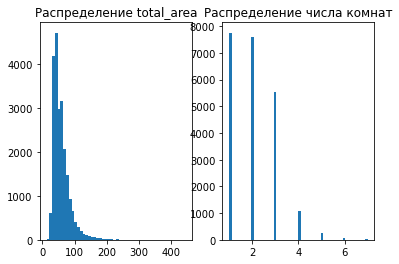

In [97]:
data_plot = data.query('last_price < 30000000')
fig, axs = plt.subplots(1, 2)
n_bins = 50
axs[0].hist(data_plot['total_area'], bins=n_bins)
axs[0].set_title('Распределение total_area')
axs[1].hist(data_plot['rooms'], bins=n_bins)
axs[1].set_title('Распределение числа комнат')

Text(0.5, 1.0, 'Распределение цен')

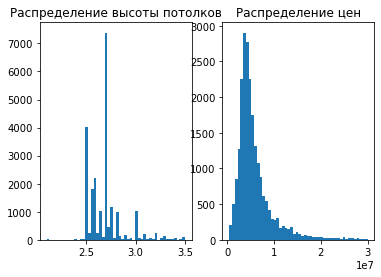

In [98]:
fig, axs = plt.subplots(1, 2)
n_bins = 50
axs[0].hist(data_plot['ceiling_height'], bins=n_bins)
axs[0].set_title('Распределение высоты потолков')
axs[1].hist(data_plot['last_price'], bins=n_bins)
axs[1].set_title('Распределение цен')

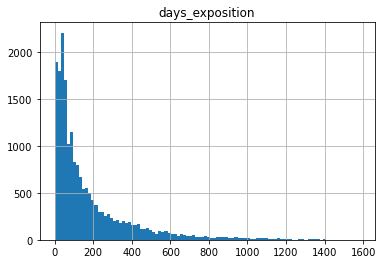

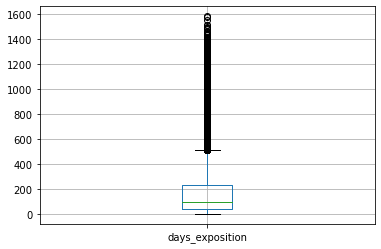

(180.80933852140078, 95.0)

In [99]:
data.hist(column='days_exposition', bins=100)
plt.show()
data.boxplot(column='days_exposition')
plt.show()
data['days_exposition'].mean(), data['days_exposition'].median()

In [100]:

Q1 = data['days_exposition'].quantile(0.25)
Q3 = data['days_exposition'].quantile(0.75)
IQR = Q3 - Q1


filtered_days_exposition = data.query('(@Q1 - 1.5 * @IQR) <= days_exposition <= (@Q3 + 1.5 * @IQR)')

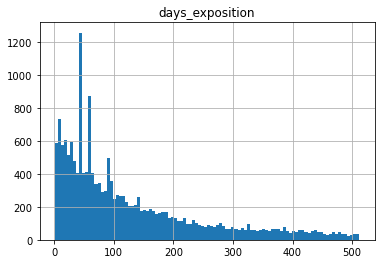

(129.01982955494904, 85.0)

In [101]:
filtered_days_exposition.hist(column='days_exposition', bins=100)
plt.show()
filtered_days_exposition['days_exposition'].mean(), filtered_days_exposition['days_exposition'].median()

In [102]:
data.query('days_exposition > 500')['days_exposition'].count() / len(data)

0.07343805466808662

In [103]:
data.query('days_exposition < 7')['days_exposition'].count() / len(data)

0.026047213347532835

In [104]:
data.query('300 < days_exposition < 500')['days_exposition'].count() / len(data)

0.09198615548455805

Все значения превышающие верхний ус - будем считать слишком долгими. Отброшено будет порядка 7%, при этом среднее значение уменьшится почти на треть, но медиана уменьшится только на 10.

Касательно слишком быстрой продажи, я не уверен т.к. это не столь очевидно как с запрпаквами в тренажере, но допустим быстрее недели - будет быстро, т.к на проверку документов, получение выписки из ЕГРН, офромление сделки нужно время.

В свою очередь, до полутра лет при таком распределении продается только 9 % квартир, что похоже на правдободобную картину.

1. Слишком долгие - 7%

2. Слишком быстрых продаж - 2,6 %

3. Существуют разовые выбросы в различных промежутках, возможно это связано с автоматической системой размещения объявлений и их снятия.


**зависит ли цена от площади, числа комнат, удалённости от центра.**

In [105]:
data['cityCenters_in_km'] = data['cityCenters_nearest']//1000
# переводим расстояние до центра города в целые километры для простоты вычисления

In [106]:
correlation_1 = data[['total_area', 'rooms', 'cityCenters_in_km', 'last_price']]
correlation_1

,total_area,rooms,cityCenters_in_km,last_price
0,108.00,3,16.0,13000000
1,40.40,1,18.0,3350000
2,56.00,2,13.0,5196000
3,159.00,3,6.0,64900000
4,30.40,1,NaN,2890000
...,...,...,...,...
22531,62.40,3,34.0,4600000
22532,133.81,3,4.0,9700000
22533,59.00,3,NaN,3100000
22534,76.75,2,10.0,11475000


In [107]:
 correlation_1.corr().iloc[3:]

,total_area,rooms,cityCenters_in_km,last_price
last_price,0.702195,0.412069,-0.267384,1.0


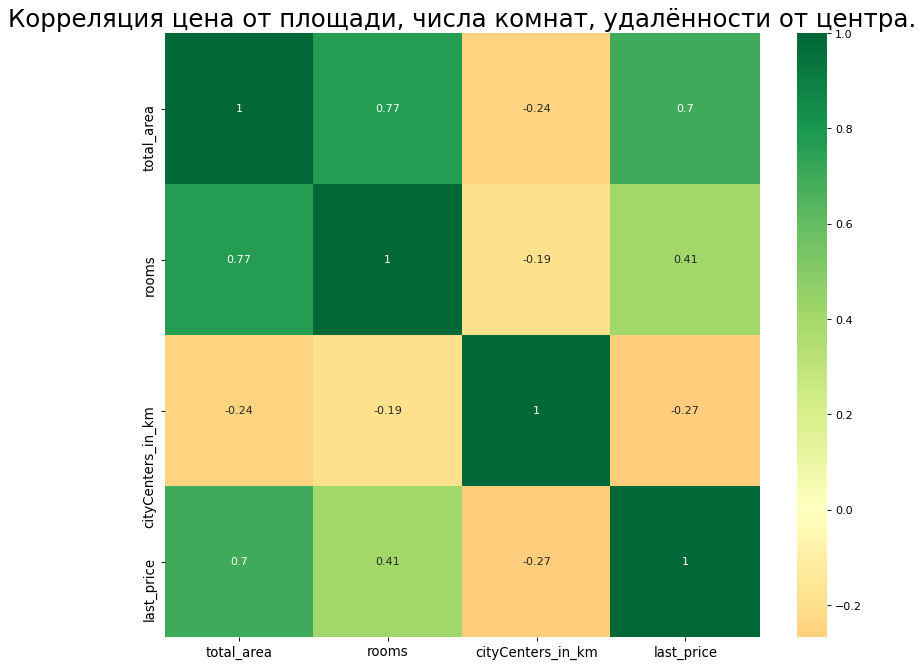

In [108]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(correlation_1.corr(), xticklabels=correlation_1.corr().columns, 
            yticklabels=correlation_1.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Корреляция цена от площади, числа комнат, удалённости от центра.', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

1. В целом об однозначной закономерности можно говорить только в случве пары last_price-total_area, что не странно, чем больше квартира, тем она дороже.
2. Показатель last_price-rooms имеет средний показатель корреляции
3. Показатель корреляции last_price-cityCenters_in_km может быть поводом для анализа, ведь отрицательное значение говорит об обратной зависимости, хоть и довольно слабой (-0,26)

**зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом**

In [109]:
correlation_2 = data[['last_price', 'floor_variant']].query('last_price < 25000000')

<AxesSubplot:title={'center':'Зависимость цены от расположения квартиры'}, xlabel='floor_variant'>

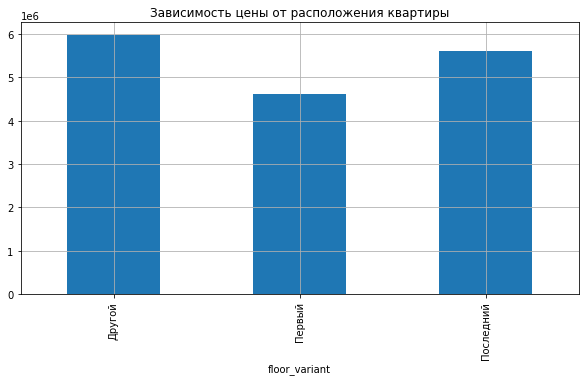

In [110]:
correlation_2 = data[['last_price', 'floor_variant']]
correlation_2 = correlation_2.query('last_price < 30000000')
(correlation_2
     .groupby('floor_variant')['last_price'].mean()
     .plot(x='floor_variant', y='last_price', kind="bar", grid=True, figsize=(10,5), title='Зависимость цены от расположения квартиры')
)

В среднем квартиры на первом этаже дешевле всех остальных.

В свою очередь этажи между последним и первым стоят больше всего.

**зависимость от даты размещения: дня недели, месяца и года.**

In [111]:
correlation_3 = data[['last_price', 'day_of_week', 'month', 'year']]

<AxesSubplot:title={'center':'Зависимость цены от дня недели размещения объявления'}, xlabel='day_of_week'>

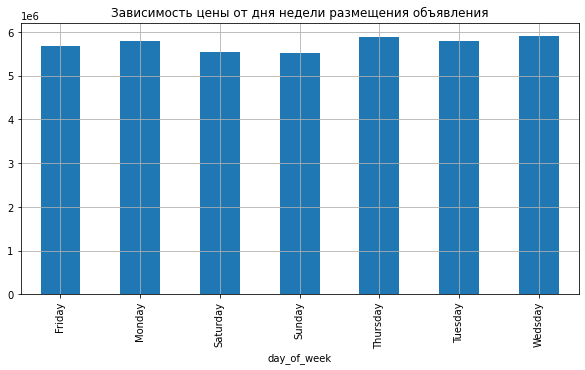

In [112]:
(correlation_3
     .query('last_price <= 30000000')
     .groupby('day_of_week')['last_price'].mean()
     .plot(x='day_of_week', y='last_price', kind="bar", grid=True, figsize=(10,5), title='Зависимость цены от дня недели размещения объявления')
)

<AxesSubplot:title={'center':'Зависимость цены от месяца размещения объявления'}, xlabel='month'>

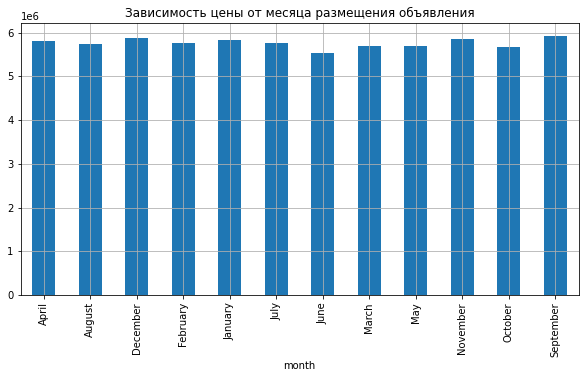

In [113]:
(correlation_3
    .query('last_price < 30000000')
    .groupby('month')['last_price'].mean()
    .plot(x='month', y='last_price', kind="bar", grid=True, figsize=(10,5), title='Зависимость цены от месяца размещения объявления')
)

<AxesSubplot:title={'center':'Зависимость цены от года размещения объявления'}, xlabel='year'>

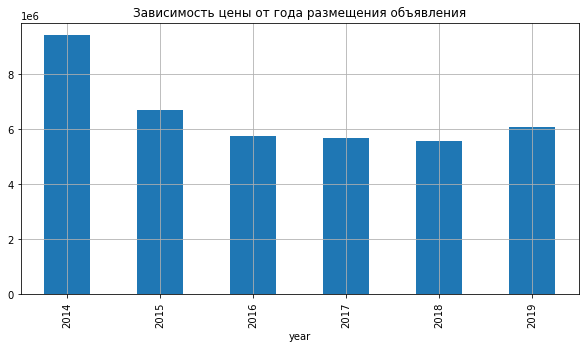

In [114]:
(correlation_3
    .query('last_price < 30000000')
    .groupby('year')['last_price'].mean()
    .plot(x='year', y='last_price', kind="bar", grid=True, figsize=(10,5), title='Зависимость цены от года размещения объявления')
)

1. В зависимости от дня недели нельзя говорить о наличии зависимости в цене.
2. такой же вывод можно сделать относительно цены и месяца размещения заявления.
3. Однако при построении графика по годам можно заметить снижение средней квартир с 2014 года

**Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах.**

In [115]:
(data
     .pivot_table(index='locality_name', values='price_per_square', aggfunc=('mean', 'count'))
     .sort_values(by= 'count', ascending=False).head(10)

)

,count,mean
locality_name,,
Санкт-Петербург,15107,113546.566637
посёлок Мурино,486,84816.305021
посёлок Шушары,427,78395.195415
Всеволожск,389,68667.666988
Пушкин,332,103597.172911
Колпино,328,75397.070951
посёлок Парголово,322,90193.074066
деревня Кудрово,281,92245.259582
Гатчина,280,69193.071248


1. Максимальная стоимость квадратного метра в Санкт-Петербурге
2. Минимальная в Выборге
3. Высокая стоимость квадратного метра в Мурино может быть связано с  расположением на границе Санкт-Петербурга и Ленинградской области, там идет активная застройка новыми жилыми комплексами со всем необходимым

**Как цена зависит от удалённости от центра**

<AxesSubplot:title={'center':'Зависимость цены от удаленности от центра Санкт-Петербурга'}, xlabel='cityCenters_in_km'>

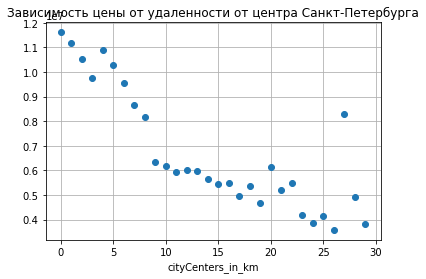

In [116]:
(data
     .query('locality_name == "Санкт-Петербург" and last_price < 30000000')
     .groupby('cityCenters_in_km')['last_price'].mean()
     .plot(x='cityCenters_in_km', y='last_price', style='o', grid=True, title='Зависимость цены от удаленности от центра Санкт-Петербурга')
)

Границей центра буду определять 8км, т.к именно 8км является той границей где происходит резкий спад цены квартиры и по графику их можно таким образом определить в две наглядные группы.

Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

Text(0.5, 1.0, 'Распределение числа комнат')

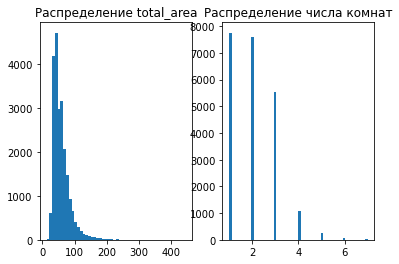

In [117]:
data_plot = data.query('last_price < 30000000')
fig, axs = plt.subplots(1, 2)
n_bins = 50
axs[0].hist(data_plot['total_area'], bins=n_bins)
axs[0].set_title('Распределение total_area')
axs[1].hist(data_plot['rooms'], bins=n_bins)
axs[1].set_title('Распределение числа комнат')

Text(0.5, 1.0, 'Распределение цен')

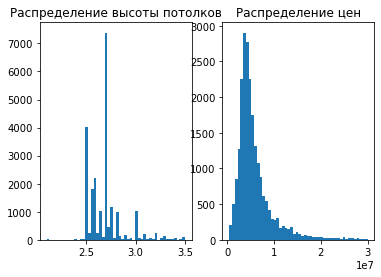

In [118]:
fig, axs = plt.subplots(1, 2)
n_bins = 50
axs[0].hist(data_plot['ceiling_height'], bins=n_bins)
axs[0].set_title('Распределение высоты потолков')
axs[1].hist(data_plot['last_price'], bins=n_bins)
axs[1].set_title('Распределение цен')

Text(0.5, 1.0, 'Распределение числа комнат СПБ')

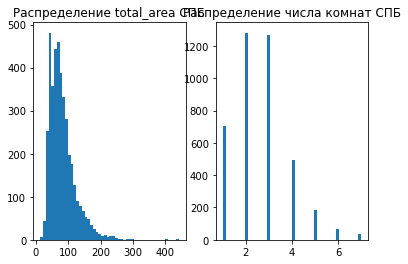

In [119]:
data_centr_plot = data.query('(cityCenters_in_km <= 8 & last_price < 40000000) & locality_name == "Санкт-Петербург"')
fig, axs = plt.subplots(1, 2)
n_bins = 50
axs[0].hist(data_centr_plot['total_area'], bins=n_bins)
axs[0].set_title('Распределение total_area СПБ')
axs[1].hist(data_centr_plot['rooms'], bins=n_bins)
axs[1].set_title('Распределение числа комнат СПБ')

Text(0.5, 1.0, 'Распределение цен СПБ')

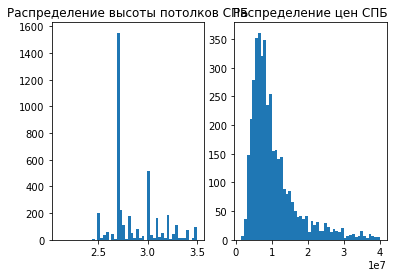

In [120]:
fig, axs = plt.subplots(1, 2)
n_bins = 50
axs[0].hist(data_centr_plot['ceiling_height'], bins=n_bins)
axs[0].set_title('Распределение высоты потолков СПБ')
axs[1].hist(data_centr_plot['last_price'], bins=n_bins)
axs[1].set_title('Распределение цен СПБ')

In [121]:
correlation_ALL = data[['total_area', 'rooms', 'cityCenters_in_km', 'last_price', 'ceiling_height']]
correlation_ALL = correlation_ALL.query('last_price < 30000000')
correlation_SPB = data[['total_area', 'rooms', 'cityCenters_in_km', 'last_price', 'ceiling_height', 'locality_name']]
correlation_SPB = correlation_SPB.query('last_price < 30000000 and locality_name == "Санкт-Петербург"')

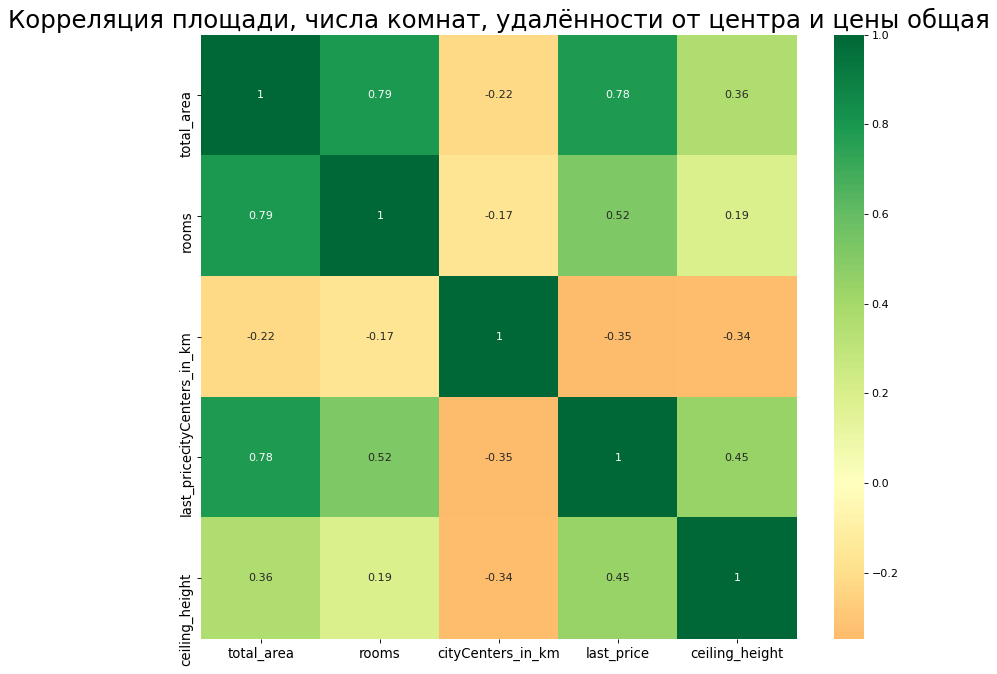

In [122]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(correlation_ALL.corr(), xticklabels=correlation_ALL.corr().columns, 
            yticklabels=correlation_ALL.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Корреляция площади, числа комнат, удалённости от центра и цены общая', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

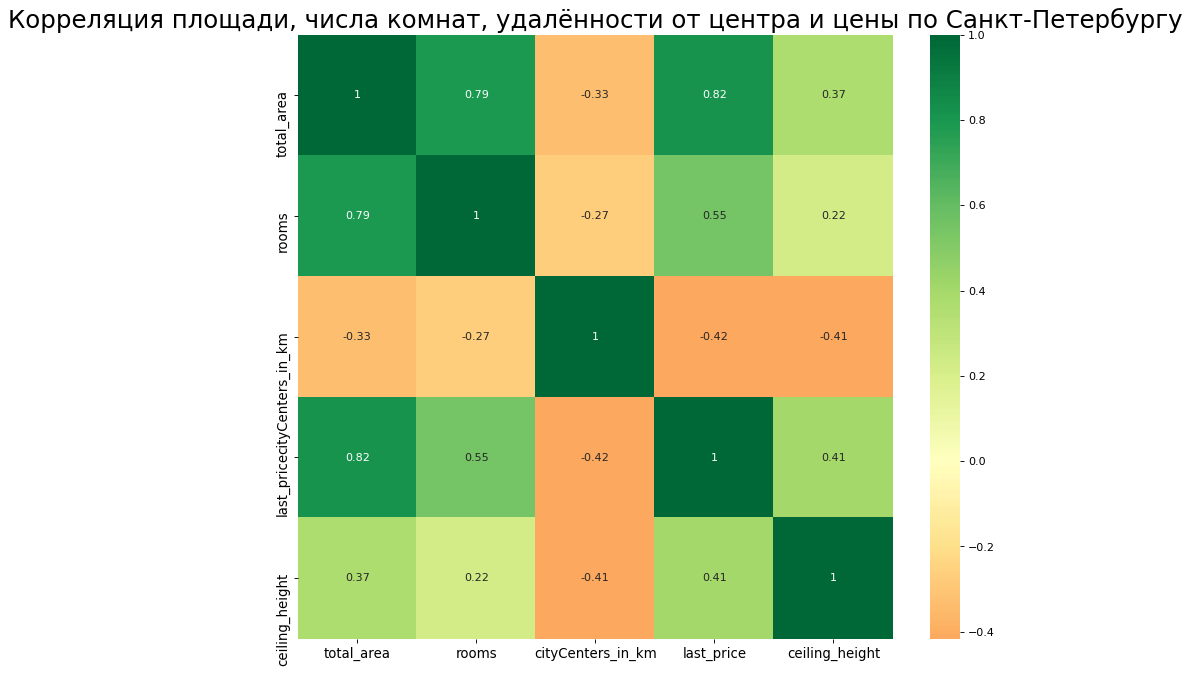

In [123]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(correlation_SPB.corr(), xticklabels=correlation_SPB.corr().columns, 
            yticklabels=correlation_SPB.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Корреляция площади, числа комнат, удалённости от центра и цены по Санкт-Петербургу', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

В целом диаграмы по Общим данных и по центру Санкт-Петербурга схожи, в основном выделяется:
1. Распределение числа комнат в центре смещено в район 3-4 комнаты
2. Распределение общей площади В Санкт-Петербурге больше смещено в право, чем по всем данным
3. Корреляционная матрица показывает, что корреляция цены и удаленности от центра по СПБ меньше, чем по всем данным
4. Количество комнат имеет так же обратную свзяь в СПБ больше, чем по общим данным

### Шаг 5. Общий вывод

В целом, распределение стоимости жилья везде похоже, за исключением того, что в крупных городах, как Санкт-Петербург есть выбивающие значения в виде элитного жилья,чья стоимость, размер и другие составляющие сильно превышают остальные.

Из анализа так же можно говорить, что рынок недвижимости в целом однороден и имеет много похожих корреляций по разным параметрам.

- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"